# Welcome to our Preliminary Evaluation of Standard models to predict the difficulty level of French text from A1 to C2. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Read training data
df = pd.read_csv('../training/training_data.csv')

Here we visualize the data

In [3]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [4]:
df.tail()

,id,sentence,difficulty
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2
4799,4799,"Sur le sable, la mer haletait de toute la resp...",C2


In [5]:
df.info

<bound method DataFrame.info of         id                                           sentence difficulty
0        0  Les coûts kilométriques réels peuvent diverger...         C1
1        1  Le bleu, c'est ma couleur préférée mais je n'a...         A1
2        2  Le test de niveau en français est sur le site ...         A1
3        3           Est-ce que ton mari est aussi de Boston?         A1
4        4  Dans les écoles de commerce, dans les couloirs...         B1
...    ...                                                ...        ...
4795  4795  C'est pourquoi, il décida de remplacer les hab...         B2
4796  4796  Il avait une de ces pâleurs splendides qui don...         C1
4797  4797  Et le premier samedi de chaque mois, venez ren...         A2
4798  4798  Les coûts liés à la journalisation n'étant pas...         C2
4799  4799  Sur le sable, la mer haletait de toute la resp...         C2

[4800 rows x 3 columns]>

Here we compute and visualize the base rate, thus the accuracy obtained using a naive classifier that predicts that all observations are from the largest class 

In [6]:
# Calculate the base rate
base_rate = round((df['difficulty'].value_counts() / len(df)) * 100, 2)
print("The base rates for each difficulty level are:")
print(base_rate.astype(str) + '%')

The base rates for each difficulty level are:
difficulty
A1    16.94%
C2    16.81%
C1    16.62%
B1    16.56%
A2    16.56%
B2     16.5%
Name: count, dtype: object


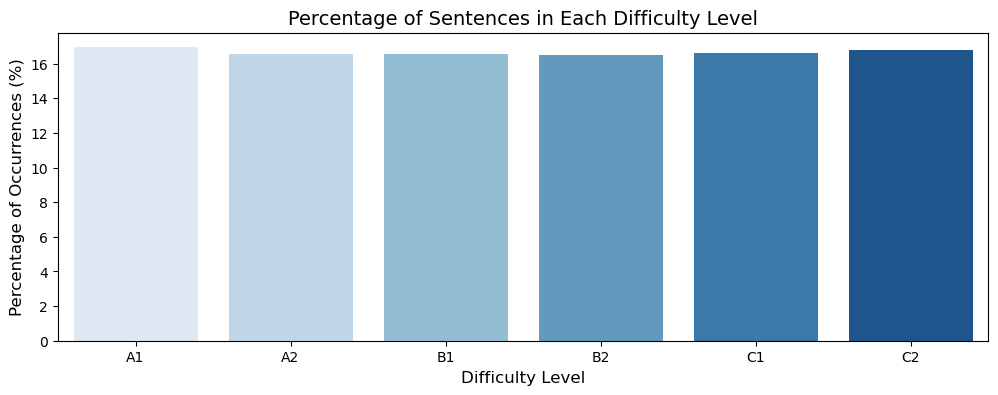

In [7]:
# Plot percentage of sentences per category
category_order = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
palette = sns.color_palette("Blues", len(category_order))
plt.figure(figsize=(12,4))
sns.barplot(x=base_rate.index, y=base_rate.values, order=category_order, palette=palette)
plt.ylabel('Percentage of Occurrences (%)', fontsize=12)
plt.xlabel('Difficulty Level', fontsize=12)
plt.title('Percentage of Sentences in Each Difficulty Level', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Here we prepare our data for a preliminary evaluation through standard models. No cleaning on the data is performed. 

In [9]:
# Extract features and target variable
X = df['sentence'] 
ylabels = df['difficulty']                

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Perform train-test split using as train 80% of the data and random state 1234
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=1234)

In [5]:
## LOGISTIC REGRESSION MODEL

# Fit model on training set - same algorithm as before
lg = LogisticRegression(max_iter=1000, solver='lbfgs')
lg.fit(X_train, y_train)

# Predictions
y_pred = lg.predict(X_test)

The accuracy using CounterVectorizer for the Logistic Regression is: 43.33%
Classification Report:
                 A1        A2        B1        B2        C1        C2  \
precision    0.5044    0.3766    0.3736    0.3776    0.4351    0.5152   
recall       0.6867    0.3718    0.3892    0.3484    0.3631    0.4277   
f1-score     0.5816    0.3742    0.3812    0.3624    0.3958    0.4674   
support    166.0000  156.0000  167.0000  155.0000  157.0000  159.0000   

           accuracy  macro avg  weighted avg  
precision    0.4333     0.4304        0.4309  
recall       0.4333     0.4311        0.4333  
f1-score     0.4333     0.4271        0.4284  
support      0.4333   960.0000      960.0000  


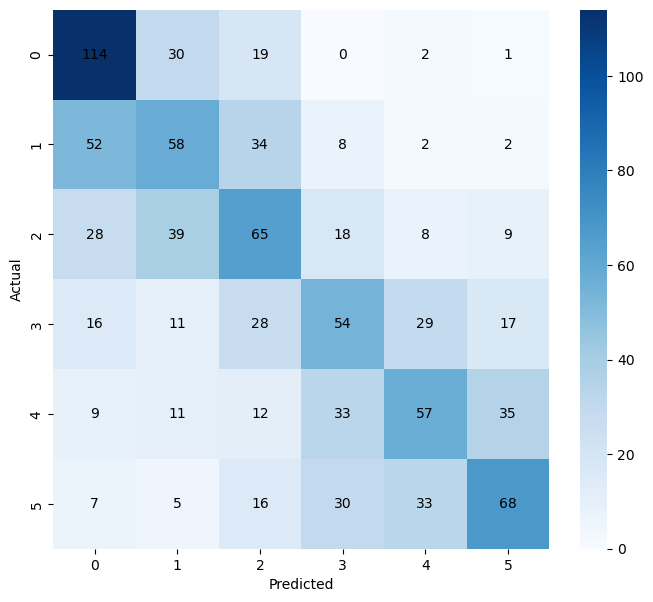

In [29]:
## EVALUATE LOGISTIC REGRESSION MODEL

# Accuracy
accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f'The accuracy using CounterVectorizer for the Logistic Regression is: {accuracy*100:0.2f}%')

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).round(4)
print("Classification Report:")
print(report_df)

##Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_mat, fmt='d', cmap='Blues', ax=ax, annot_kws={"size": 10})
for i in range(len(conf_mat)):
    for j in range(len(conf_mat)):
        ax.text(j+0.5, i+0.5, conf_mat[i, j], ha='center', va='center', color='black', fontsize=10)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
## kNN CLASSIFIER 

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Train the kNN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_knn = knn_classifier.predict(X_test)

Test Accuracy of kNN Classifier: 20.94%


Test Accuracy of kNN Classifier: 20.94%
Classification Report for kNN Classifier:
                 A1        A2        B1        B2        C1        C2  \
precision    0.2140    0.1176    0.2143    0.2222    0.3333    0.8889   
recall       0.9759    0.0897    0.0539    0.0387    0.0127    0.0503   
f1-score     0.3510    0.1018    0.0861    0.0659    0.0245    0.0952   
support    166.0000  156.0000  167.0000  155.0000  157.0000  159.0000   

           accuracy  macro avg  weighted avg  
precision    0.2094     0.3317        0.3310  
recall       0.2094     0.2036        0.2094  
f1-score     0.2094     0.1208        0.1227  
support      0.2094   960.0000      960.0000  


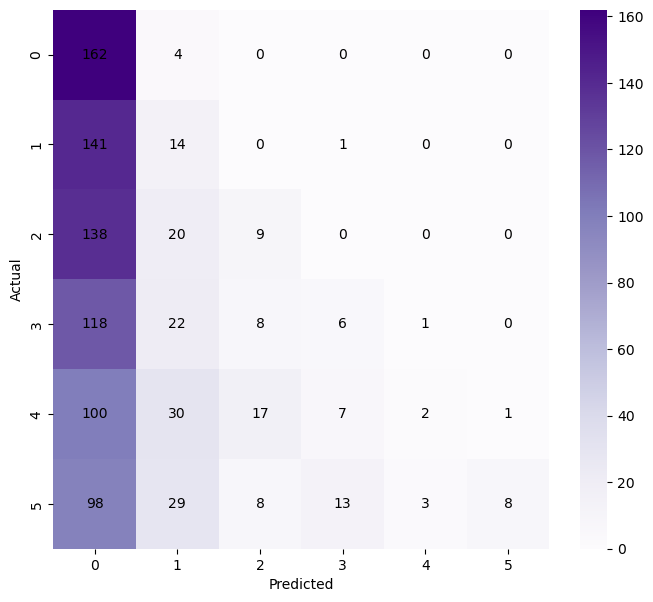

In [31]:
## EVALUATE kNN CLASSIFIER

# Calculate accuracy score
test_accuracy_knn = accuracy_score(y_test, predictions_knn) * 100
print(f"Test Accuracy of kNN Classifier: {test_accuracy_knn:.2f}%")

# Display classification matrix
report_knn = classification_report(y_test, predictions_knn, output_dict=True)
report_df_knn = pd.DataFrame(report_knn).round(4)
print("Classification Report for kNN Classifier:")
print(report_df_knn)

# Display confusion matrix
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_matrix_knn, fmt='d', cmap='Purples', ax=ax, annot_kws={"size": 10})
for i in range(len(conf_matrix_knn)):
    for j in range(len(conf_matrix_knn)):
        ax.text(j+0.5, i+0.5, conf_matrix_knn[i, j], ha='center', va='center', color='black', fontsize=10)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
## DECISION TREE CLASSIFIER

# Initialize the Decision Tree classifier
random_seed = 1234
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=random_seed)

# Train the Decision Tree classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_DecisionTree = decision_tree_classifier.predict(X_test)

Test Accuracy of Decision Tree Classifier: 28.54%


Test Accuracy of Decision Tree Classifier: 28.54%
Classification Report for Decision Tree Classifier:
                 A1        A2        B1        B2        C1        C2  \
precision    0.3556    0.2431    0.2222    0.2228    0.2723    0.4694   
recall       0.5120    0.3974    0.0120    0.2645    0.3885    0.1447   
f1-score     0.4198    0.3017    0.0227    0.2419    0.3202    0.2212   
support    166.0000  156.0000  167.0000  155.0000  157.0000  159.0000   

           accuracy  macro avg  weighted avg  
precision    0.2854     0.2976        0.2979  
recall       0.2854     0.2865        0.2854  
f1-score     0.2854     0.2546        0.2536  
support      0.2854   960.0000      960.0000  


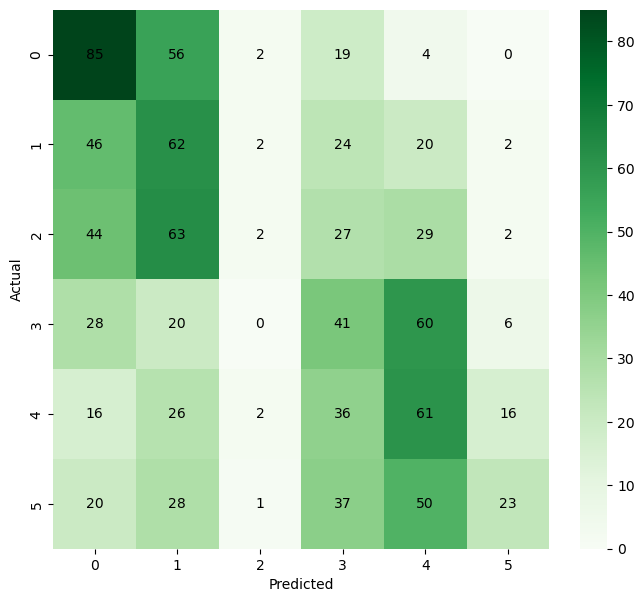

In [33]:
## EVALUATE DECISION TREE CLASSIFIER

# Calculate accuracy score
test_accuracy_decision_tree = accuracy_score(y_test, predictions_DecisionTree) * 100
print(f"Test Accuracy of Decision Tree Classifier: {test_accuracy_decision_tree:.2f}%")

# Display classification matrix
report_DecisionTree = classification_report(y_test, predictions_DecisionTree, output_dict=True)
report_df_DecisionTree = pd.DataFrame(report_DecisionTree)
report_df_DecisionTree_rounded = report_df_DecisionTree.round(4)

print("Classification Report for Decision Tree Classifier:")
print(report_df_DecisionTree_rounded)

# Display confusion matrix
conf_matrix_DecisionTree = confusion_matrix(y_test, predictions_DecisionTree)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_matrix_DecisionTree, fmt='d', cmap='Greens', ax=ax, annot_kws={"size": 10})
for i in range(len(conf_matrix_DecisionTree)):
    for j in range(len(conf_matrix_DecisionTree)):
        ax.text(j+0.5, i+0.5, conf_matrix_DecisionTree[i, j], ha='center', va='center', color='black', fontsize=10)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
## RANDOM FOREST CLASSIFIER

# Train your classification algorithm
random_seed = 1234
classifier = RandomForestClassifier(random_state=random_seed)

# Fit classifier on training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions_RandomForest = classifier.predict(X_test)

Test Accuracy of Random Forest Classifier: 35.00%
Classification Report for Random Forest Classifier:
                 A1        A2        B1        B2        C1        C2  \
precision    0.4006    0.2893    0.2517    0.2833    0.3645    0.4947   
recall       0.8012    0.2949    0.2216    0.2194    0.2484    0.2956   
f1-score     0.5341    0.2921    0.2357    0.2473    0.2955    0.3701   
support    166.0000  156.0000  167.0000  155.0000  157.0000  159.0000   

           accuracy  macro avg  weighted avg  
precision      0.35     0.3474        0.3474  
recall         0.35     0.3468        0.3500  
f1-score       0.35     0.3291        0.3304  
support        0.35   960.0000      960.0000  


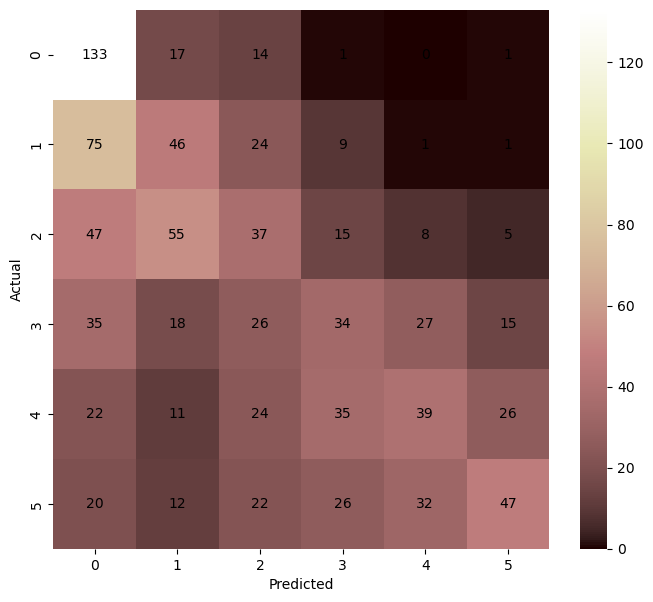

In [38]:
## EVALUATE RANDOM FOREST CLASSIFIER

# Calculate test accuracy
test_accuracy_classifier = accuracy_score(y_test, predictions_RandomForest) * 100

# Print the test accuracy
print(f"Test Accuracy of Random Forest Classifier: {test_accuracy_classifier:.2f}%")

# Display classification matrix
report_RandomForest = classification_report(y_test, predictions_RandomForest, output_dict=True)
report_df_RandomForest = pd.DataFrame(report_RandomForest).round(4)

print("Classification Report for Random Forest Classifier:")
print(report_df_RandomForest)

# Display confusion matrix
conf_matrix_RandomForest = confusion_matrix(y_test, predictions_RandomForest)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_matrix_RandomForest, fmt='d', cmap='pink', ax=ax, annot_kws={"size": 10})
for i in range(len(conf_matrix_RandomForest)):
    for j in range(len(conf_matrix_RandomForest)):
        ax.text(j+0.5, i+0.5, conf_matrix_RandomForest[i, j], ha='center', va='center', color='black', fontsize=10)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [6]:
## ANY OTHER TECHNIQUE: Tuned kNN Classifier 

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 16)}

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)

# Perform grid search to find the best value of n_neighbors
grid_search.fit(X_train, y_train)

# Get the best value of n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best value of 'n_neighbors': {best_n_neighbors}")

## Train the kNN classifier with the best value of n_neighbors

# Initialize the kNN classifier with the best value of n_neighbors
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Train the kNN classifier with the best value of n_neighbors
best_knn_classifier.fit(X_train, y_train)

# Evaluate the performance of the best kNN classifier
predictions_knn_best = best_knn_classifier.predict(X_test)

best_test_accuracy_knn = accuracy_score(y_test, predictions_knn_best) * 100
print(f"Test Accuracy of Tuned kNN Classifier: {best_test_accuracy_knn:.2f}%")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best value of 'n_neighbors': 1
Test Accuracy of Tuned kNN Classifier: 24.79%


Classification Report for Tuned kNN Classifier:
                 A1        A2        B1        B2        C1        C2  \
precision    0.2412    0.1944    0.2407    0.2903    0.3056    0.7083   
recall       0.7470    0.2692    0.1557    0.1161    0.0701    0.1069   
f1-score     0.3647    0.2258    0.1891    0.1659    0.1140    0.1858   
support    166.0000  156.0000  167.0000  155.0000  157.0000  159.0000   

           accuracy  macro avg  weighted avg  
precision    0.2479     0.3301        0.3294  
recall       0.2479     0.2442        0.2479  
f1-score     0.2479     0.2075        0.2089  
support      0.2479   960.0000      960.0000  


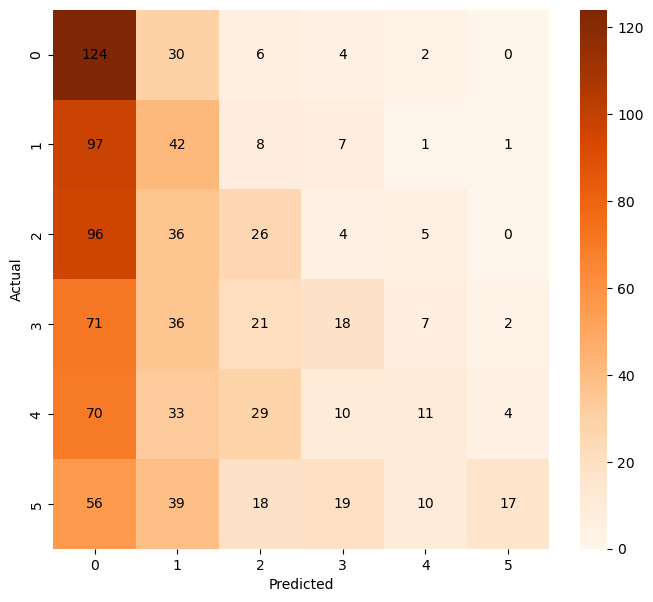

In [7]:
## EVALUATE TUNED kNN CLASSIFIER

# Display classification matrix
report_best_knn = classification_report(y_test, predictions_knn_best, output_dict=True)
report_df_best_knn = pd.DataFrame(report_best_knn).round(4)

print("Classification Report for Tuned kNN Classifier:")
print(report_df_best_knn)

# Display confusion matrix
conf_matrix_best_knn = confusion_matrix(y_test, predictions_knn_best)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(conf_matrix_best_knn, fmt='d', cmap='Oranges', ax=ax, annot_kws={"size": 10})
for i in range(len(conf_matrix_best_knn)):
    for j in range(len(conf_matrix_best_knn)):
        ax.text(j+0.5, i+0.5, conf_matrix_best_knn[i, j], ha='center', va='center', color='black', fontsize=10)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
